# Harmonic Oscillator

Harmonic oscillator in one space dimension.
$$
    -\frac{1}{2} \partial_x^2 \psi + \frac{1}{2}\omega^2 x^2\psi = E \psi
$$

The Hamiltonian $H = -\frac{1}{2} \partial_x^2 + \frac{1}{2}\omega^2 x^2$ is done by finite differences for the differential operator and by point evaluation for the multiplication operator.

The Hamiltonian is assembled as a `SymTridiagonal` object, by providing the diagonal and the subdiagonal.

In [6]:
# loading necessary packages
using Plots
using LaTeXStrings

# parameters of the equation
ω = 1.

# space discretization
n = 1000
L = 10.
x = collect(linspace(-L, L, n+2))[2:end-1]
Δx = x[2] - x[1]

# discretization of the Hamiltonian
H = SymTridiagonal(-0.5 / Δx^2 * -2. * ones(n) + 0.5 * ω^2 * x.^2, -0.5 / Δx^2 * ones(n - 1));

The computation of eigenvalues is implemented efficiently for the `SymTridiagonal` type.

In [7]:
(eigenvalues, eigenfunctions) = eig(H);

Plotting the first 3 eigenfunctions we see the expected shape of Gaussian times polynomial.


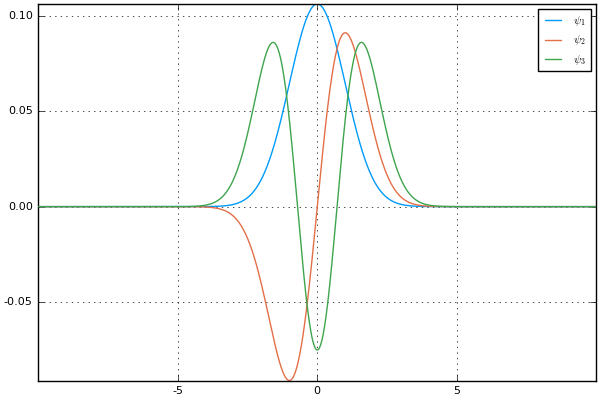

In [8]:
plot(x, [eigenfunctions[:, k] for k in 1:3], labels=[latexstring("\\psi_$j") for j = 1:3]')

The eigenvalues of the continuous problem where given by $\frac{2n + 1}{2}$ for $n = 0, 1, \dotsc$. The eigenvalues computed for the numerical approximation are close to the actual eigenvalues only for the lowest eigenvalues. For larger eigenvalues thay first show a quadratic growth like for the particle in a box, and then level off for very large eigenvalues (as do the eigenvalues for the finite difference laplacian in a box).


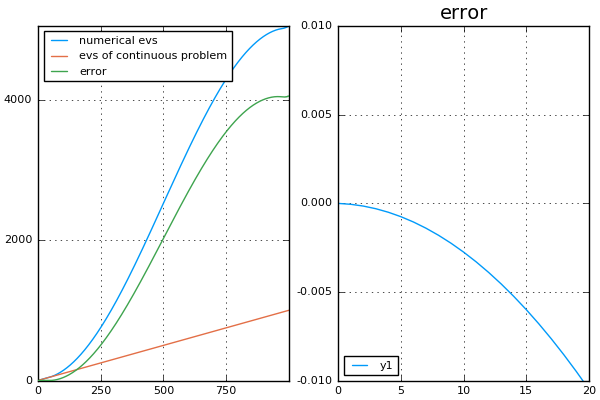

In [9]:
p1 = plot(0:(n-1), [eigenvalues (2 * (0:n-1) + 1) / 2 * ω eigenvalues - (2 * (0:n-1) + 1) / 2 * ω], labels=["numerical evs" "evs of continuous problem" "error"])
p2 = plot(0:(n-1), eigenvalues - (2 * (0:n-1) + 1) / 2 * ω, xlim=[0, 20], ylim=[-0.01, 0.01], title="error")
plot(p1, p2)